# Global Suicide Statistics Analysis
This notebook analyzes global suicide data from the WHO suicide statistics dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('who_suicide_statistics.csv')
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


## Clean and Prepare Data

In [2]:
if 'suicides/100k pop' not in df.columns:
    df['suicides/100k pop'] = (df['suicides_no'] / df['population']) * 100000
df_clean = df[['country','year','sex','age','population','suicides/100k pop']]
df_clean.head()

,country,year,sex,age,population,suicides/100k pop
0,Albania,1985,female,15-24 years,277900.0,NaN
1,Albania,1985,female,25-34 years,246800.0,NaN
2,Albania,1985,female,35-54 years,267500.0,NaN
3,Albania,1985,female,5-14 years,298300.0,NaN
4,Albania,1985,female,55-74 years,138700.0,NaN


## Global Trend Over Time

In [ ]:
global_trend = df_clean.groupby('year')['suicides/100k pop'].mean()
plt.figure(figsize=(8,5))
plt.plot(global_trend.index, global_trend.values)
plt.xlabel('Year')
plt.ylabel('Average Suicides per 100k')
plt.title('Global Suicide Rate Trend Over Time')
plt.show()

## Top 10 Countries by Average Suicide Rate

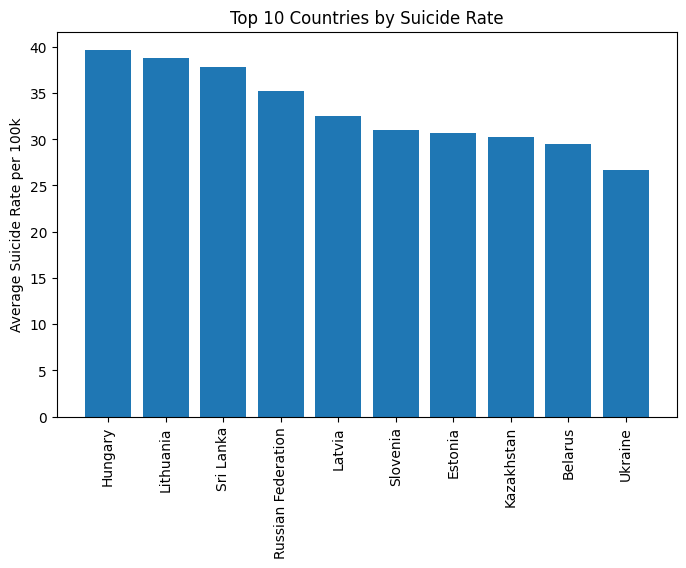

In [3]:
country_avg = df_clean.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
plt.bar(country_avg.index, country_avg.values)
plt.xticks(rotation=90)
plt.ylabel('Average Suicide Rate per 100k')
plt.title('Top 10 Countries by Suicide Rate')
plt.show()

## Gender Comparison

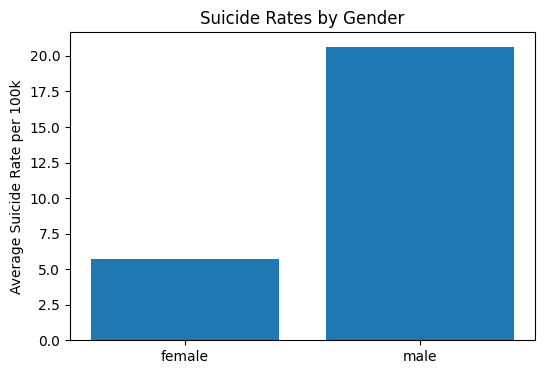

In [4]:
gender_avg = df_clean.groupby('sex')['suicides/100k pop'].mean()
plt.figure(figsize=(6,4))
plt.bar(gender_avg.index, gender_avg.values)
plt.ylabel('Average Suicide Rate per 100k')
plt.title('Suicide Rates by Gender')
plt.show()